+ This Jupyter notebook<sup>[1]</sup> is part of the Klopper Letures on Discrete Matheamtics and covers *directed graphs*
+ Created by me, Dr Juan H Klopper
    + Head of Acute Care Surgery
    + Groote Schuur Hospital
    + University Cape Town
    + <a href="mailto:juan.klopper@uct.ac.za">Email me with your thoughts, comments, suggestions and corrections</a> 
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" href="http://purl.org/dc/dcmitype/InteractiveResource" property="dct:title" rel="dct:type">The Klopper Lectures on Discrete Mathematics</span> <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName"></span> study notes is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

+ [1] Fernando Pérez, Brian E. Granger, IPython: A System for Interactive Scientific Computing, Computing in Science and Engineering, vol. 9, no. 3, pp. 21-29, May/June 2007, doi:10.1109/MCSE.2007.53. URL: http://ipython.org

In [1]:
from IPython.core.display import HTML
#css_file = 'numericalmoocstyle.css'
#css_file = "custom.css"
css_file = 'style.css'
HTML(open(css_file, 'r').read())

In [5]:
#import numpy as np
#import scipy as sp
import networkx as nx
import sympy as sym
import matplotlib.pyplot as plt

In [3]:
from IPython.display import Image

In [4]:
%matplotlib inline
sym.init_printing(use_latex = "mathjax")

# Set operations

## In this lesson

Follow these links
- [Introduction](#Introduction)
- [Degrees](#Degrees)
- [Paths, trails, cycles, and others](#Paths,-trails,-cycles,-and-others)
- [Connectivity](#Connectivity)
- [Rooted trees](#Rooted-trees)
- [The adjacency matrix](#The-adjacency-matrix)
- [Path matrices](#Path-matrices)

## Introduction

We add a bit of direction to our graphs in this lesson by turning our edges into *one-way* roads.  These are termed **directed graphs** or **digraphs**.

We still have a set $ V $ of vertices or nodes and a set $ E $ of edges, although we might also refer to them as **directed edges** or **arcs**.  When we denote an edge in the form $ \left( u,v \right) $ we state that $ u $ is the **origin** or **initial point** and $ v $ is the **destination** or **terminal point**.  In this case we can also say that $ v $ is the **successor** of $ u $.

Some textbooks also use the terms **adjacent to** and **adjacent from**, as in $ u $ is adjacent to $ v $ and $ v $ is adjacent from $ u $.  All the nodes that are adjacent from $ u $ are called the **adjacency list** or **successor list** of $ u $.

In the case where $ u = v $ we have a **directed loop** or simply a **loop**.

We indicate the direction of an edge with a tuple of the form $ \left( u,v \right) $, i.e. (below) $ E \left( G \right) = \left\{ {e}_{1}, {e}_{2} \right\} = \left\{ \left( A, B \right), \left( B, B \right) \right\} $.

In [12]:
G = nx.DiGraph()

G.add_nodes_from(["A", "B"])
G.add_edges_from([("A", "B"), ("B", "B")])

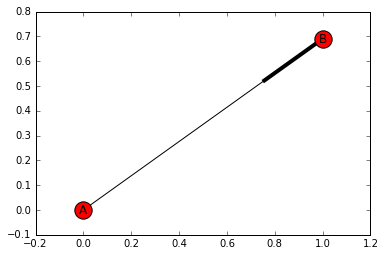

In [13]:
# Will be drawn differently every time
nx.draw_networkx(G)
plt.show();

In [14]:
# List nodes with loops
nx.DiGraph.nodes_with_selfloops(G)

['B']

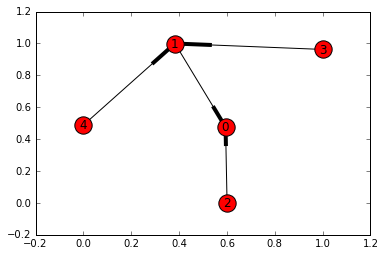

In [11]:
# A GN digraph with 5 nodes
H = nx.gn_graph(5)
nx.draw_networkx(H)
plt.show();

[Back to the top](#In-this-lesson)

<hr>
<h2>Degrees</h2>

Since edges are directed every node might have a number of edges that originate from and a number of edges that might terminate in it.  The number of edges that originate from a node is the **indegree** of the node and the number of edges that terminate at a node is the node's **outdegree**.

The sum total of the indegrees equals the sum total of the outdegrees, which equals the numder of edges of a digraph.

A connected node with a zero outdegree (only edges that terminate with it) is termed a **sink**.  A node with a zero indegree (only edges that originate from it) is termed a **source**.

[Back to the top](#In-this-lesson)

<hr>
<h2>Paths, trails, cycles, and others</h2>

These terms are taken from non-directed graphs.  So, a **path** is an alternating set of nodes and directed edges.

The **length** of a path counts the number of edges traversed.

A path with distinct nodes is a **simple path**, whereas a path with distinct edges is termed a **trail**.  If a node $ v $ can be reached along directed esges from a node $ u $, then by deleting redundant edges, we can create a simple path from $ u $ to $ v $.

If the first and last node in a path coincides we have a **closed path**.  If all the nodes vsisted are distinct then we have a **cycle**, also termed a **circuit**.

A path that visits all the nodes is termed a **spanning path**.

A path that connects nodes, but in which at least on edge is against its direction is termed a **semipath**.

[Back to the top](#In-this-lesson)

<hr>
<h2>Connectivity</h2>

In a **strongly connected** graph we have that for any pair of nodes, $ u $ and $ v $, node $ v $ is reachable from a node $ u $ along a path, but the same node $ u $ is also reachable from the same node $ v $.  This can occur if and only if the graph has a closed, spanning path.

In a **unilaterally connected** graph we have that for any pair of nodes, $ u $ and $ v $, there is only in path in one of the directions.  This can occur if and only if the graph has a spanning path.

In a **weakly connected** graph we have that for any pair of nodes, we can only find a semipath.  This can occur if and only if the graph has a spanning semipath.

We note that there is an order to this connectivity, i.e. a strongly connected graph implies a unilaterally connected graph which implies a weakly connected graph.  A graph that is weakly connected but not unilaterally connected is termed **strictly weak connected** and a unilaterally connected graph that is not strongly connected is termed **strictly unilaterally connected.**

From nondirected graphs we remember that a connected graph has a path between any of its nodes.  If we take a directed graph and alter the edges so that they are not directed and this non-directed version is found to be connected, then the original graph is weakly connected.

If a graph is cycle-free, it contains a source and a sink.

[Bakc to the top](#In-this-lesson)

<hr>
<h2>Rooted trees</h2>

Frm the previous lesson we remember that a **tree** is a cycle-free connected graph.  We can turn a tree into a **rooted tree** by designating one of the nodes as a root.  From this root, which can be any of the nodes in a connected graph, there is a unique path to any of the other nodes.  If we choose a root this implies a direction to each of the other nodes.

The length of the unique path from the root to a node $ v $ is termed the **level** or the **depth** of the node and the maximum level or depth is the level of depth of the tree.

The nodes with degree $ 1 $ (other than the root) are termed the **leaves** of the tree and the edge from the root to these leaves are termed the **branches** of the tree.

In [17]:
G = nx.Graph()

G.add_nodes_from(["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "r"])
G.add_edges_from([("r", "a"), ("r", "b"), ("r", "c"), ("a", "d"), ("a", "e"),
                  ("e", "h"), ("b", "f"), ("c", "g"),
                 ("g", "i"), ("g", "j")])

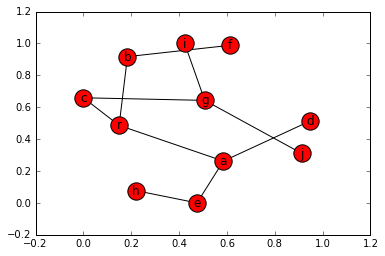

In [18]:
nx.draw_networkx(G)
plt.show();

In [19]:
# Checking of G is a tree
nx.is_tree(G)

True

Note that ever node except the root is preceded by a unique node, but that every node can have more than one successor.

We can use these trees to look at all the possible. logical outcomes of a sequence of events.  Imagine that we have a binary outcome (either *success* of *failure*) and that an expreminet will rerun until we have two successes or failures in a row or a total of three of either.  The image below shows the logical outcomes.

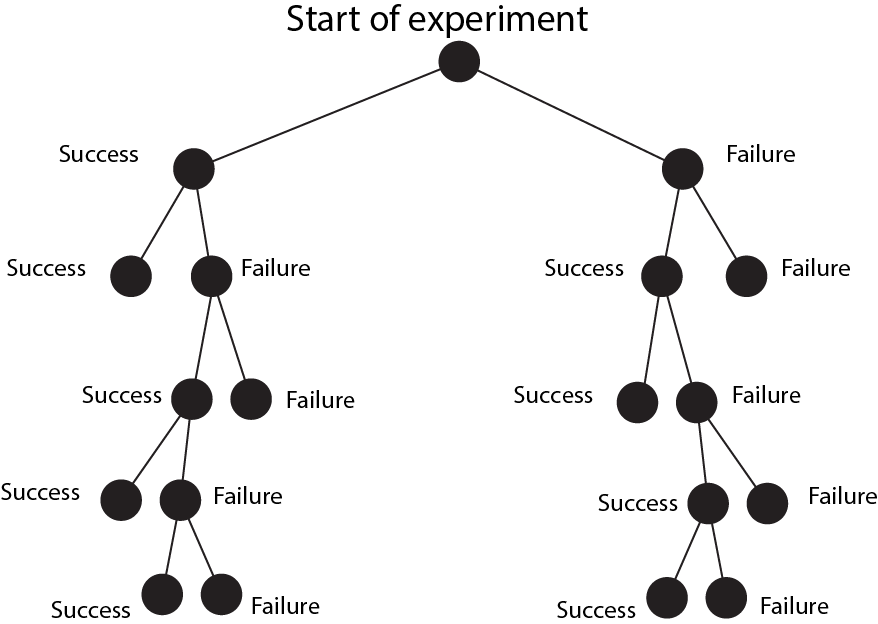

In [27]:
Image("StartExperiment.png", width = 400)

Nodes in a rooted tree can be ordered, giving every node an address.  The image below shows the addresses of each node.

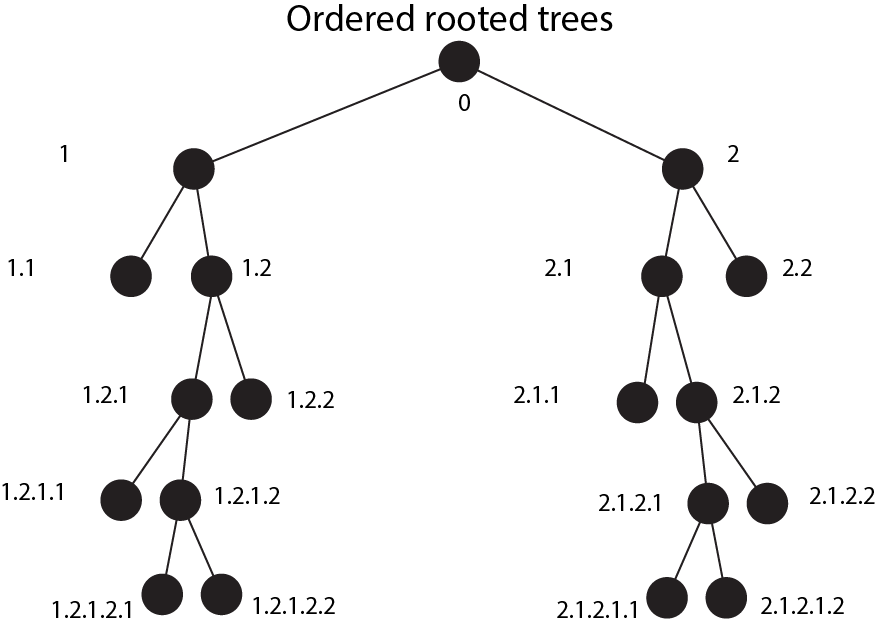

In [28]:
Image("OrderedRootedTrees.png", width = 400)

[Back to the top](#In-this-lesson)

<hr>
<h2>The adjacency matrix</h2>

We complete an adjacency matrix as we did for non-directed graphs.  This can be kept as a sparse, scipy matrix or a numpy matrix.

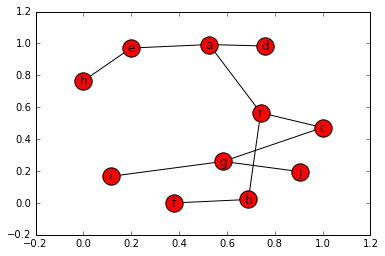

In [29]:
# G from above
nx.draw_networkx(G)
plt.show();

In [33]:
# Sparse scipy matrix
print(nx.adj_matrix(G))

  (0, 6)	1
  (0, 10)	1
  (1, 6)	1
  (2, 3)	1
  (3, 2)	1
  (3, 7)	1
  (3, 10)	1
  (4, 6)	1
  (5, 7)	1
  (6, 0)	1
  (6, 1)	1
  (6, 4)	1
  (7, 3)	1
  (7, 5)	1
  (8, 9)	1
  (8, 10)	1
  (9, 8)	1
  (10, 0)	1
  (10, 3)	1
  (10, 8)	1


In [37]:
nx.to_numpy_matrix(G)

matrix([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])

This matrix depends on the order of the nodes.  Different orders can be represented by interchanging rows or columns.

We can calculate the number of paths between vertices.

In [46]:
G = nx.DiGraph()

G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 4), (2, 1), (2, 3), (2, 4),
                  (3, 1), (3, 4), (4, 3), (4, 1)])

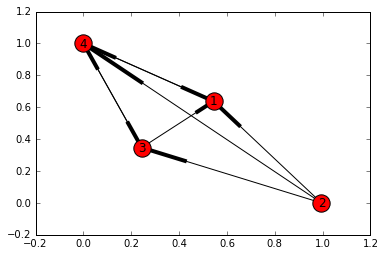

In [47]:
nx.draw_networkx(G)
plt.show();

In [48]:
adjacency_matrix_G = nx.to_numpy_matrix(G)
print(adjacency_matrix_G)

[[ 0.  0.  0.  1.]
 [ 1.  0.  1.  1.]
 [ 1.  0.  0.  1.]
 [ 1.  0.  1.  0.]]


Considering the first row, we note that node $ 1 $ does not loop to itself, nor does it have directed edges to nodes $ 2 $ or $ 3 $.  It does have to node $ 4 $, though.  This results in a first row of $ \left[ 0,0,0,1 \right] $.

If we multiply the adjacency matrix by itself we get a new matrix (see below).

In [49]:
adjacency_matrix_G * adjacency_matrix_G

matrix([[ 1.,  0.,  1.,  0.],
        [ 2.,  0.,  1.,  2.],
        [ 1.,  0.,  1.,  1.],
        [ 1.,  0.,  0.,  2.]])

The square in `adjacency_matrix_G`<sup>2</sup> indicates paths of length $ 2 $.  Again, if we consider row $ 1 $ we see that there is $ 1 $ path from node $ 1 $ back to node $ 1 $.  It is via node $ 4 $ if we consider the image of the graph.

If we cube the adjacency matrix we get the number of paths of length $ 3 $ from a node to another and so on.  Remember that we have set up the graph so that we start at the row level and go to each colum for that row to read of the edge from node $ u $ to node $ v $.

If we add the matrices formed by successive powers, we get a matrix termed $ {B}_{r} $ such that if the adjacency matrix is termed $ A $, we have
$$ {B}_{r} = {A} + {A}^{2} + {A}^{2} + \dots + {A}^{r} $$
such that the $ ij $<sup>th</sup> entry of $ {B}_{r} $ gives the number of paths of length $ r $ or less from node $ {v}_{i} $ to node $ {v}_{j} $.

[Back to the top](#In-this-lesson)

<hr>
<h2>Path matrices</h2>